# Description

This notebook calculates and plots the poisson distribution for an event occuring with a rate ```r_rate``` during a ```test_duration```.

Assuming there is a known, constant rate ```r_rate``` between 0 (never occuring) and infinity, this tells you how probable it is that you get 0, 1, 2, ... events happening during a test of ```test_duration``` length.

Note: all probabilities are given as numbers between 0 and 1, where 0 represents "never" and 1 represents 100% certainty.

# Parameters

In [1]:
test_duration = 10 #measure of how long the test was run [km, hours, ...]
r_event = 0.1 #rate with which the relevant event occurs [#/km, #/hour, ...]

assert isinstance(test_duration, (int, float)) and test_duration >= 0
assert isinstance(r_event, float) and r_event >= 0

# Evaluation

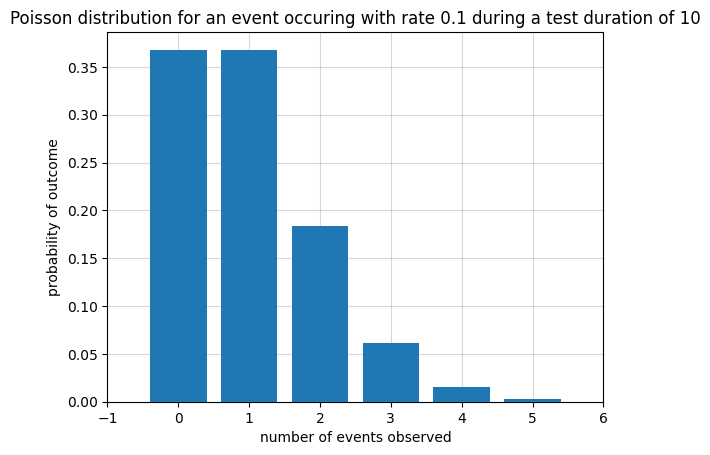

In [2]:
import matplotlib.pyplot as plt
import mpmath as mp
import numpy as np

mp.mp.dps = 50 #use 50 decimal digits precision in mpmath calculations

def poisson_distr(n_events, r_event, test_duration):
    return mp.power(mp.mpf(r_event*test_duration), n_events) / mp.fac(n_events) * mp.exp(-r_event*test_duration)

poisson_distr_vectorized = np.vectorize(poisson_distr) #create version of poisson distribution that can be evaluated for whole lists of inputs

r_plotmax = r_event*test_duration*5 #change plot range here

x = np.arange(0, r_plotmax+1) #list of all possible outcomes (number of events observed x during test_duration)
P_x = poisson_distr_vectorized(x, r_event, test_duration) #probabilities of each of these outcomes

#plot
plt.bar(x, P_x, zorder=3)

plt.gca().set_title('Poisson distribution for an event occuring with rate {} during a test duration of {}'.format(r_event, test_duration))
plt.gca().set_xlabel('number of events observed')
plt.gca().set_ylabel('probability of outcome')
plt.grid(alpha=0.5)

plt.gca().set_xlim([-1, r_plotmax+1]);